In [1]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

import matplotlib

matplotlib.rcParams['figure.facecolor'] = '303030'
matplotlib.rcParams['axes.facecolor'] = '303030'
matplotlib.rcParams['text.color'] = 'FFFFFF'
matplotlib.rcParams['xtick.color'] = 'FFFFFF'
matplotlib.rcParams['ytick.color'] = 'FFFFFF'
matplotlib.rcParams['axes.labelcolor'] = 'FFFFFF'

import numpy

In [2]:
LAMDA_INF = 0
LAMDA_SUP = 0.25
NB_LAMDA = 25

lamda = numpy.arange(LAMDA_INF, LAMDA_SUP, (LAMDA_SUP - LAMDA_INF)/NB_LAMDA)

K_INF = 20
K_SUP = 100
NB_K = 80
k = numpy.arange(K_INF, K_SUP, (K_SUP-K_INF)/NB_K)

(80, 25) (80, 25) (80, 25)
1


/run/user/1000/ipykernel_21802/4064337422.py:47: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


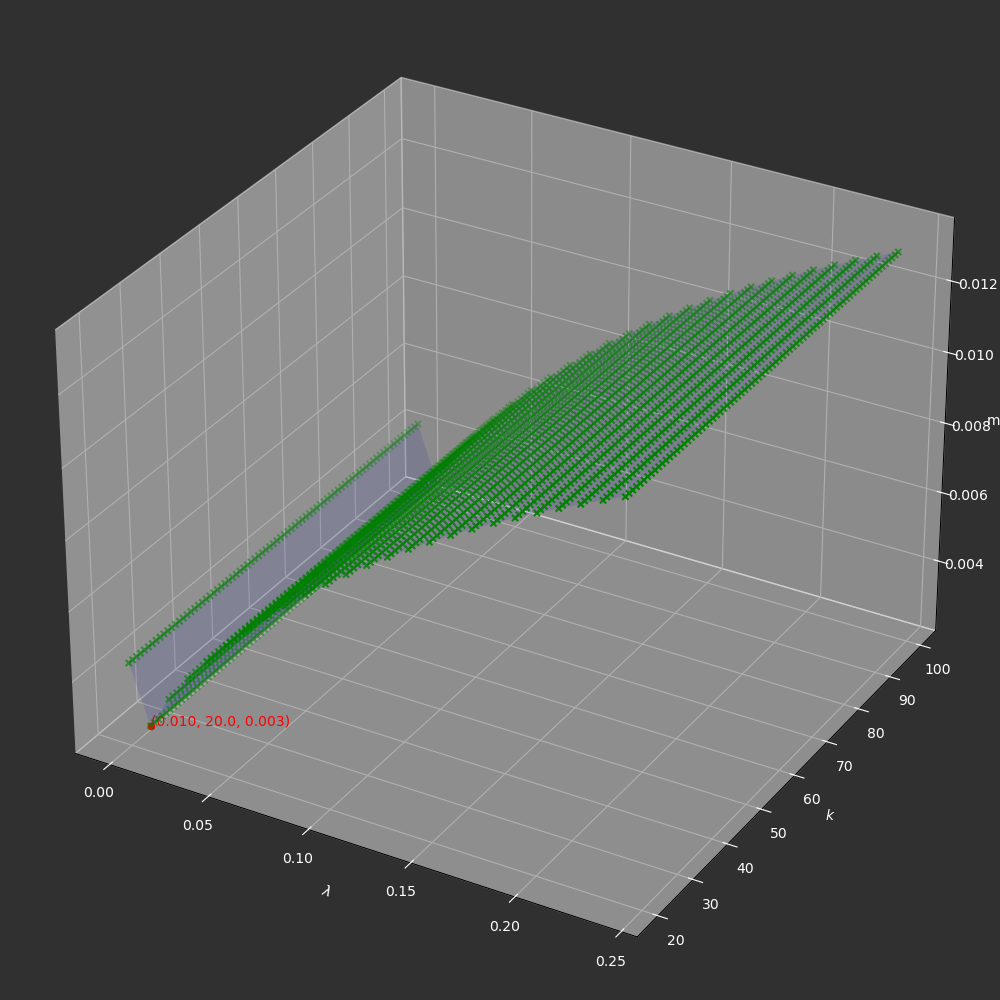

In [3]:
%matplotlib widget

mse = numpy.array(numpy.load('./mse.npy'))
fontsize = 30

# # Sigma color
# x = numpy.arange(start=0.0, stop=1.0, step=0.1)
# # Sigma spatial
# y = numpy.arange(start=1, stop=10, step=1)
X, Y = numpy.meshgrid(lamda, k)


Xp = numpy.reshape(X, newshape=(1, -1))[0]
Yp = numpy.reshape(Y, newshape=(1, -1))[0]


# print(len(list(zip(Xp, Yp))))

# for sigma_color, sigma_spatial in list(zip(Xp, Yp)):
X_plt: numpy.ndarray = X
Y_plt: numpy.ndarray = Y
Z_mse_plt: numpy.ndarray = mse.T
# Z_psnr_plt: numpy.ndarray = Z_psnr[1:, 1:]

print(X_plt.shape, Y_plt.shape, Z_mse_plt.shape)

index_best: int = numpy.argmin(Z_mse_plt, axis=None)
print(index_best)
coord_best: tuple[int, int] = numpy.unravel_index(index_best, Z_mse_plt.shape)


# Set up a figure twice as tall as it is wide
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
# matplotlib.pyplot.suptitle('A tale of 2 subplots')


# BEST IMAGE DENOISED
# matplotlib.pyplot.subplot(1, 3, 1)
# matplotlib.pyplot.title('Best denoised', fontsize=fontsize)
# matplotlib.pyplot.axis('off')
# matplotlib.pyplot.imshow(images_denoised[index_best], cmap='gray')


# Graph 3D MSE

# ax: matplotlib.pyplot.Axes = matplotlib.pyplot.subplot(1, 1, 1, projection='3d')
ax = Axes3D(fig)

## Display surface and points
_ = ax.plot_surface(X_plt, Y_plt, Z_mse_plt, color='blue', alpha=0.1)
_ = ax.scatter(X_plt, Y_plt, Z_mse_plt, color='green', marker='x')

## Display best point
s_color, s_spatial, mse = X_plt[coord_best], Y_plt[coord_best], Z_mse_plt[coord_best]
_ = ax.scatter(s_color, s_spatial, mse, color='red', marker='o')
_ = ax.text(s_color, s_spatial, mse, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mse), color='red')


# setting title and labels
_ = ax.set_title('MSE', fontsize=fontsize)
_ = ax.set_xlabel('$\lambda$')
_ = ax.set_ylabel('$k$')
_ = ax.set_zlabel('mse')

(80, 25) (80, 25) (80, 25)
1


/run/user/1000/ipykernel_21802/4239838506.py:47: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


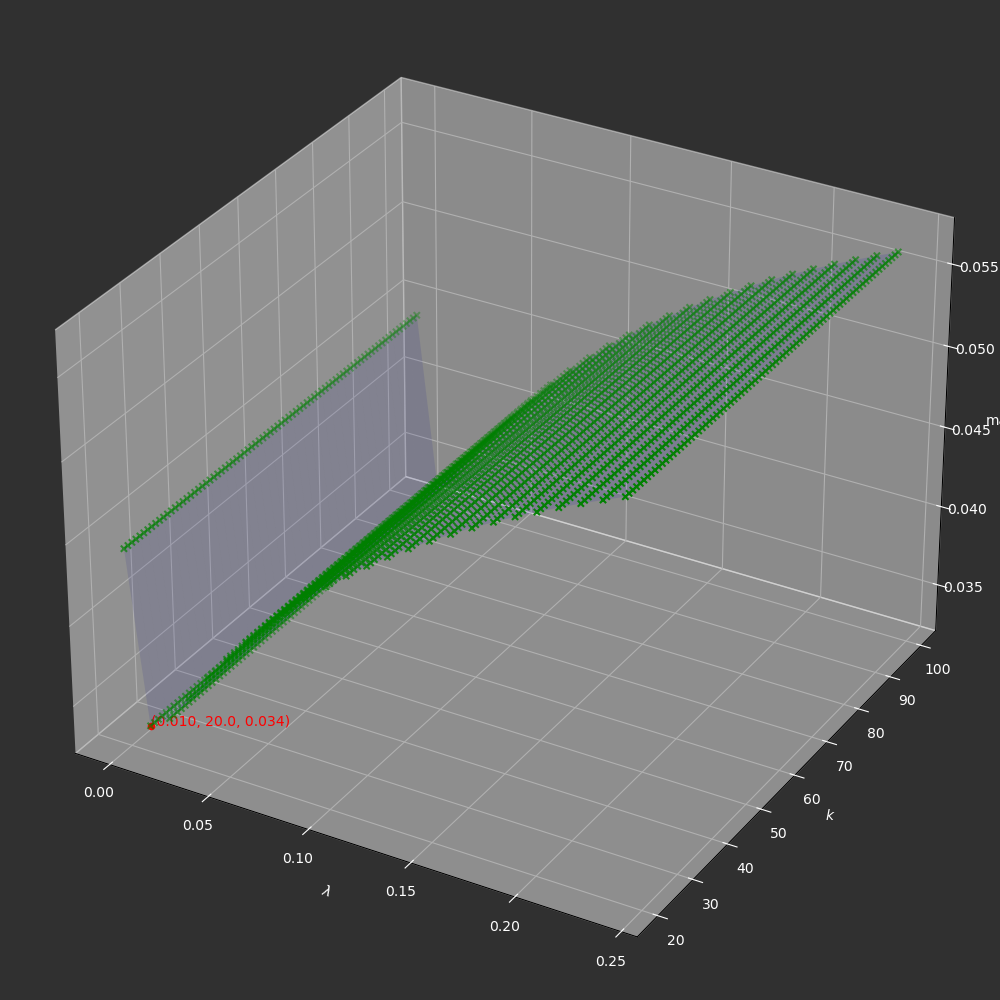

In [5]:
%matplotlib widget

mse = numpy.array(numpy.load('./mae.npy'))
fontsize = 30

# # Sigma color
# x = numpy.arange(start=0.0, stop=1.0, step=0.1)
# # Sigma spatial
# y = numpy.arange(start=1, stop=10, step=1)
X, Y = numpy.meshgrid(lamda, k)


Xp = numpy.reshape(X, newshape=(1, -1))[0]
Yp = numpy.reshape(Y, newshape=(1, -1))[0]


# print(len(list(zip(Xp, Yp))))

# for sigma_color, sigma_spatial in list(zip(Xp, Yp)):
X_plt: numpy.ndarray = X
Y_plt: numpy.ndarray = Y
Z_mse_plt: numpy.ndarray = mse.T
# Z_psnr_plt: numpy.ndarray = Z_psnr[1:, 1:]

print(X_plt.shape, Y_plt.shape, Z_mse_plt.shape)

index_best: int = numpy.argmin(Z_mse_plt, axis=None)
print(index_best)
coord_best: tuple[int, int] = numpy.unravel_index(index_best, Z_mse_plt.shape)


# Set up a figure twice as tall as it is wide
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
# matplotlib.pyplot.suptitle('A tale of 2 subplots')


# BEST IMAGE DENOISED
# matplotlib.pyplot.subplot(1, 3, 1)
# matplotlib.pyplot.title('Best denoised', fontsize=fontsize)
# matplotlib.pyplot.axis('off')
# matplotlib.pyplot.imshow(images_denoised[index_best], cmap='gray')


# Graph 3D MSE

# ax: matplotlib.pyplot.Axes = matplotlib.pyplot.subplot(1, 1, 1, projection='3d')
ax = Axes3D(fig)

## Display surface and points
_ = ax.plot_surface(X_plt, Y_plt, Z_mse_plt, color='blue', alpha=0.1)
_ = ax.scatter(X_plt, Y_plt, Z_mse_plt, color='green', marker='x')

## Display best point
s_color, s_spatial, mse = X_plt[coord_best], Y_plt[coord_best], Z_mse_plt[coord_best]
_ = ax.scatter(s_color, s_spatial, mse, color='red', marker='o')
_ = ax.text(s_color, s_spatial, mse, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mse), color='red')


# setting title and labels
_ = ax.set_title('MSE', fontsize=fontsize)
_ = ax.set_xlabel('$\lambda$')
_ = ax.set_ylabel('$k$')
_ = ax.set_zlabel('mae')